# Homework 4 - Programming Section Notebook

## Context

Given a dataset of bank client accounts and a target variable describing wether or not the client has a term deposit, create an unsupervised learning predictor through clustering of the data.

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_file_path = "accounts.csv"

data_df = pd.read_csv(dataset_file_path)
data_labels = data_df.columns
n_labels_to_keep = 8

X = data_df.drop(axis=1, labels=data_labels[n_labels_to_keep:])

''' #This approach corresponds to a possible interpretation of the worksheet where    #categorical variables are kept to 1 column, meaning the index within the generated #dummie columns is what is actually used in the column.

for label in data_labels[0:n_labels_to_keep]:
    if label != 'age' and label != 'balance': #these two categories are numerical
        X[label] = [np.where(x)[0][0] for x in pd.get_dummies(X[label], dtype='int64').values]
'''

X = pd.get_dummies(X, drop_first=True)
X = X.drop_duplicates()
X = X.dropna()

# Ensure data_df has the same entries as X
data_df = data_df.loc[X.index]

X

,age,job,marital,education,default,balance,housing,loan
0,59,0,1,1,0,2343,1,0
1,56,0,1,1,0,45,0,0
2,41,9,1,1,0,1270,1,0
3,55,7,1,1,0,2476,1,0
4,54,0,1,2,0,184,0,0
...,...,...,...,...,...,...,...,...
11156,34,1,2,1,0,-72,1,0
11157,33,1,2,0,0,1,1,0
11158,39,7,1,1,0,733,0,0
11159,32,9,2,1,0,29,0,0


## 1 - Clustering when normalizing the data using MinMaxScaler

In [273]:
from sklearn.preprocessing import MinMaxScaler

## MinMaxScaler Data Normalization
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled

,age,job,marital,education,default,balance,housing,loan
0,0.532468,0.000000,0.5,0.333333,0.0,0.104371,1.0,0.0
1,0.493506,0.000000,0.5,0.333333,0.0,0.078273,0.0,0.0
2,0.298701,0.818182,0.5,0.333333,0.0,0.092185,1.0,0.0
3,0.480519,0.636364,0.5,0.333333,0.0,0.105882,1.0,0.0
4,0.467532,0.000000,0.5,0.666667,0.0,0.079851,0.0,0.0
...,...,...,...,...,...,...,...,...
10311,0.207792,0.090909,1.0,0.333333,0.0,0.076944,1.0,0.0
10312,0.194805,0.090909,1.0,0.000000,0.0,0.077773,1.0,0.0
10313,0.272727,0.636364,0.5,0.333333,0.0,0.086086,0.0,0.0
10314,0.181818,0.818182,1.0,0.333333,0.0,0.078091,0.0,0.0


### 1.a) SSE for each number of clusters, per different ks when applying k-means clustering

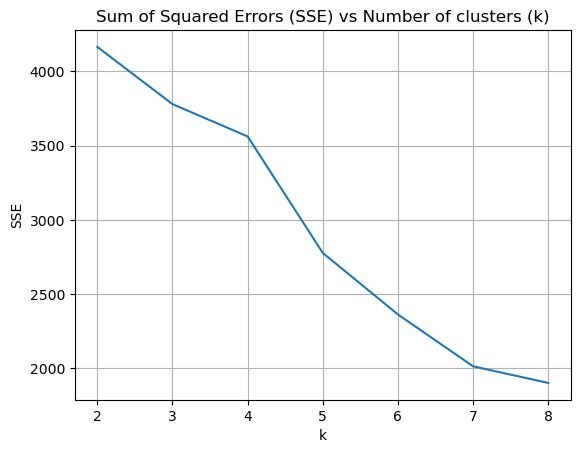

In [274]:
from sklearn.cluster import KMeans

k_arr = [2,3,4,5,6,7,8]

sse_arr = []

for k in k_arr:
    cluster = KMeans(n_clusters=k,max_iter=500,random_state=42)
    cluster.fit(X_scaled)
    sse_arr.append(cluster.inertia_)

sse_df = pd.DataFrame({
    'k': k_arr,
    'SSE': sse_arr
})

sns.lineplot(data=sse_df,x='k', y='SSE')
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Sum of Squared Errors (SSE) vs Number of clusters (k)")
plt.grid()
plt.show()

### 1.c) Aiding code

In [275]:
data_df.drop(axis=1, labels="deposit").info()

<class 'pandas.core.frame.DataFrame'>
Index: 10316 entries, 0 to 11160
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        10316 non-null  int64 
 1   job        10316 non-null  object
 2   marital    10316 non-null  object
 3   education  10316 non-null  object
 4   default    10316 non-null  object
 5   balance    10316 non-null  int64 
 6   housing    10316 non-null  object
 7   loan       10316 non-null  object
 8   contact    10316 non-null  object
 9   day        10316 non-null  int64 
 10  month      10316 non-null  object
 11  duration   10316 non-null  int64 
 12  campaign   10316 non-null  int64 
 13  pdays      10316 non-null  int64 
 14  previous   10316 non-null  int64 
 15  poutcome   10316 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.3+ MB


## 2 - Clustering when normalizing the data using StandardScaler

In [276]:
from sklearn.preprocessing import StandardScaler

## StandardScaler Data Normalization
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X_scaled

,age,job,marital,education,default,balance,housing,loan
0,1.526295,-1.377703,-0.311334,-0.358208,-0.128666,0.268512,1.022153,-0.400180
1,1.270320,-1.377703,-0.311334,-0.358208,-0.128666,-0.470024,-0.978327,-0.400180
2,-0.009553,1.403102,-0.311334,-0.358208,-0.128666,-0.076331,1.022153,-0.400180
3,1.184995,0.785145,-0.311334,-0.358208,-0.128666,0.311255,1.022153,-0.400180
4,1.099670,-1.377703,-0.311334,0.971507,-0.128666,-0.425352,-0.978327,-0.400180
...,...,...,...,...,...,...,...,...
10311,-0.606827,-1.068725,1.280990,-0.358208,-0.128666,-0.507626,1.022153,-0.400180
10312,-0.692152,-1.068725,1.280990,-1.687923,-0.128666,-0.484165,1.022153,-0.400180
10313,-0.180203,0.785145,-0.311334,-0.358208,-0.128666,-0.248913,-0.978327,-0.400180
10314,-0.777477,1.403102,1.280990,-0.358208,-0.128666,-0.475166,-0.978327,-0.400180


### 2.a) Applying PCA to data

In [277]:
from sklearn.decomposition import PCA
import re

decomposer = PCA(n_components=2)
X_reduced = decomposer.fit_transform(X_scaled)

pca_components = [re.findall(r'\d+',pca) for pca in decomposer.get_feature_names_out()]
#print(decomposer.feature_names_in_)
pca_components = [decomposer.feature_names_in_[int(pca_components[0][0])], decomposer.feature_names_in_[int(pca_components[1][0])]] #This line finds to which original feature the best components map to
print(pca_components) #the first value corresponds to the best component, the second to the second best
print(decomposer.explained_variance_)
print(decomposer.explained_variance_ratio_)
print(decomposer.singular_values_)


['age', 'job']
[1.5413113  1.37026442]
[0.19264524 0.17126645]
[126.08975409 118.88766738]


### 2.b) Scatterplot according to first 2 principal components

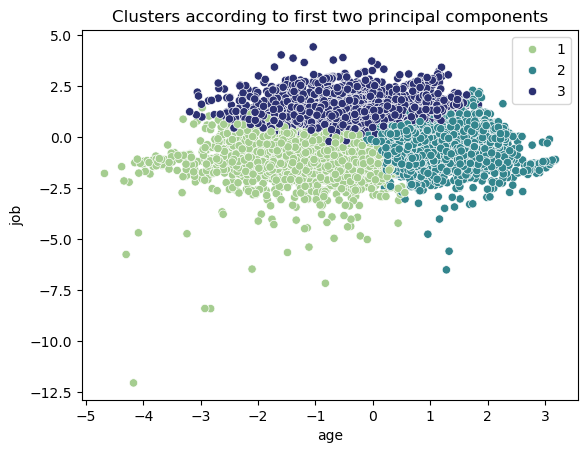

In [278]:
cluster = KMeans(n_clusters=3, random_state=42)
cluster.fit(X_scaled)
clusters_prediction = cluster.predict(X_scaled)


#cluster_centers_df = pd.DataFrame(cluster.cluster_centers_)
#plt.scatter(cluster_centers_df[0], cluster_centers_df[1], marker='*', s=200, c='red', label='Cluster Centers')
#for i, center in cluster_centers_df.iterrows():
#    plt.annotate(f'Cluster {i+1}', (center[0], center[1]), textcoords="offset points", xytext=(0,15), ha='center', color="orange", backgroundcolor = "gray", fontsize="small")

sns.scatterplot(x=X_reduced[:, list(decomposer.feature_names_in_).index(pca_components[0])], y=X_reduced[:, list(decomposer.feature_names_in_).index(pca_components[1])], hue=(clusters_prediction+1), palette="crest")      
plt.xlabel(pca_components[0])
plt.ylabel(pca_components[1])
plt.title("Clusters according to first two principal components")
plt.legend()
plt.show()

### 2.c) Cluster conditional features of "job" and "education", from cluster using first 2 principal components

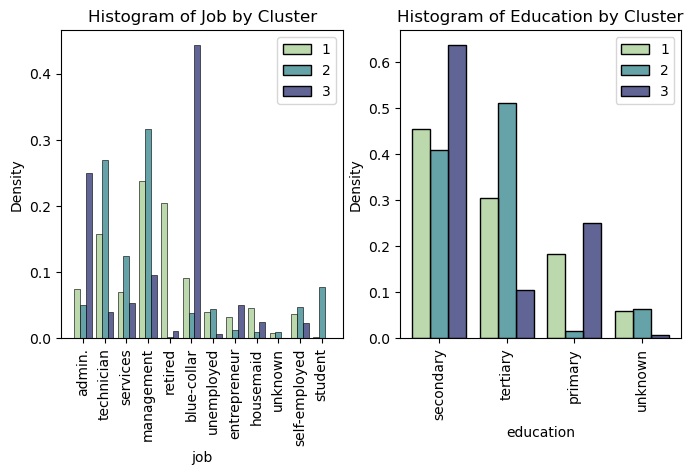

In [279]:
component_names = ["job", "education"]

# Get unique values for job and education
job_labels = data_df["job"].unique()
education_labels = data_df["education"].unique()

# Create a mapping from categorical values to numerical values
job_mapping = {label: idx for idx, label in enumerate(job_labels)}
education_mapping = {label: idx for idx, label in enumerate(education_labels)}


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))
sns.histplot(data_df, x="job", hue=(clusters_prediction+1), multiple="dodge", stat="density", shrink=0.8, common_norm=False, palette="crest", ax=ax1)
sns.histplot(data_df, x="education", hue=(clusters_prediction+1), multiple="dodge", stat="density", shrink=0.8, common_norm=False, palette="crest", ax=ax2)

ax1.set_xticks(range(len(job_labels)))
ax1.set_xticklabels(job_labels, rotation=90)
ax2.set_xticks(range(len(education_labels)))
ax2.set_xticklabels(education_labels, rotation=90)

ax1.set_title("Histogram of Job by Cluster")
ax2.set_title("Histogram of Education by Cluster")
plt.show()